 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [397]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [398]:
# Reading whale returns
whale_path = Path("resources/whale_returns.csv")
whale_portfolio = pd.read_csv(whale_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


In [399]:
# Count nulls
whale_portfolio.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [400]:
# Drop nulls
whale_portfolio = whale_portfolio.dropna().copy()
whale_portfolio.sort_index(ascending=True, inplace=True)
whale_portfolio.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [401]:
# Reading algorithmic returns
algo_path = Path("resources/algo_returns.csv")
algo_portfolio = pd.read_csv(algo_path, parse_dates=True, index_col='Date', infer_datetime_format=True)


In [402]:
# Count nulls
algo_portfolio.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [403]:
# Drop nulls
algo_portfolio = algo_portfolio.dropna().copy()
algo_portfolio.sort_index(ascending=True, inplace=True)
algo_portfolio.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [404]:
# Reading S&P 500 Closing Prices
sp500_path = Path("resources/sp500_history.csv")
sp500_portfolio = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_portfolio.sort_index(ascending=True, inplace=True)
sp500_portfolio.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [405]:
# Check Data Types
sp500_portfolio.dtypes

Close    object
dtype: object

In [406]:
# Fix Data Types

# function to convert currency string with $, commas to float
def convert_currency(val):
    """
    Convert the string number value to a float
     - Remove $, commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

sp500_portfolio['Close'] = sp500_portfolio['Close'].apply(convert_currency)
sp500_portfolio.head()


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [407]:
# Calculate Daily Returns
sp500_daily_returns = sp500_portfolio.pct_change()
sp500_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [408]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [409]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"SP500"})
sp500_daily_returns.head()


,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [410]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_portfolio, algo_portfolio, sp500_daily_returns], axis='columns', join='inner')
combined_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

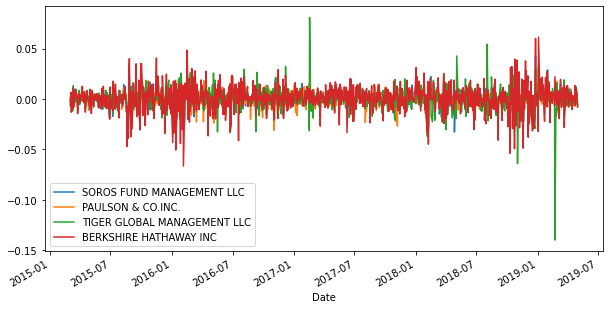

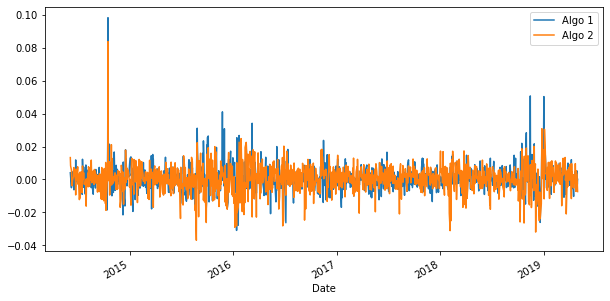

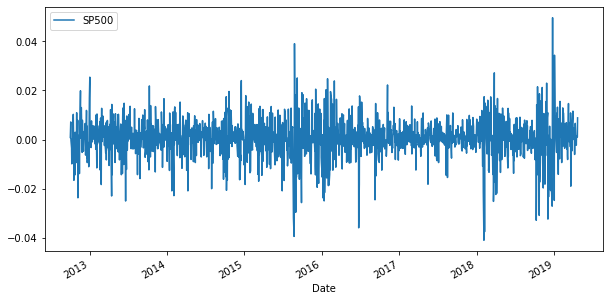

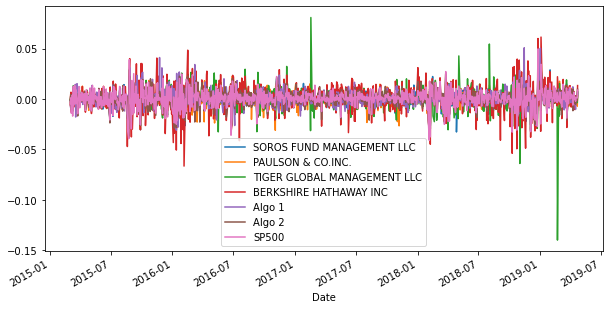

In [411]:
# Plot daily returns of all portfolios
whale_portfolio.plot(figsize=(10,5))
algo_portfolio.plot(figsize=(10,5))
sp500_daily_returns.plot(figsize=(10,5))

combined_returns.plot(figsize=(10,5))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

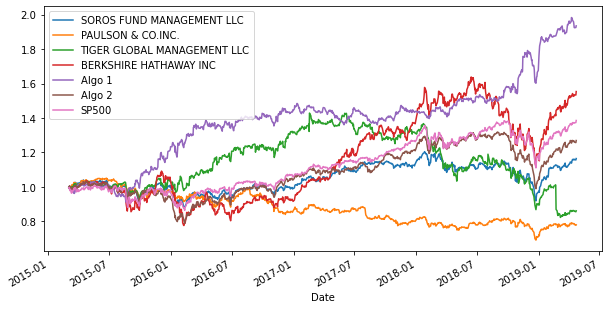

In [412]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

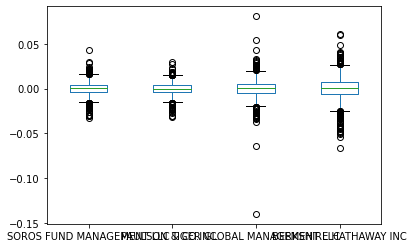

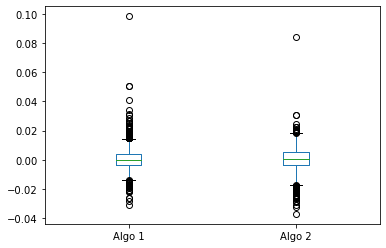

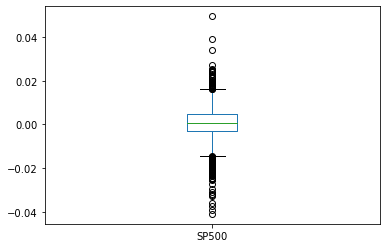

In [413]:
# Box plot to visually show risk
whale_portfolio.plot.box()
algo_portfolio.plot.box()
sp500_daily_returns.plot.box()


### Calculate Standard Deviations

In [414]:
# Calculate the daily standard deviations of all portfolios
combined_returns_std = combined_returns.std()
combined_returns_std.sort_values(ascending=False, inplace=True)
combined_returns_std


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [415]:
# Calculate  the daily standard deviation of S&P 500
sp500_returns_std = sp500_daily_returns.std()

# Determine which portfolios are riskier than the S&P 500
riskier_sp500 = []
for portfolio in combined_returns_std.index:
    if combined_returns_std[portfolio] > sp500_returns_std['SP500'] and portfolio != 'SP500':
        riskier_sp500.append(portfolio)

riskier_sp500


['BERKSHIRE HATHAWAY INC', 'TIGER GLOBAL MANAGEMENT LLC', 'Algo 2']

### Calculate the Annualized Standard Deviation

In [416]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_returns_std * np.sqrt(252)
annualized_std


BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

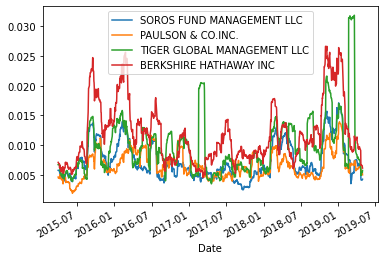

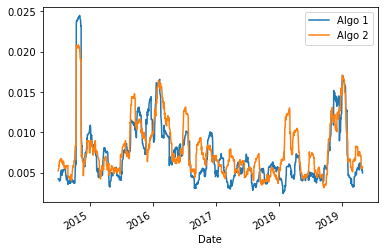

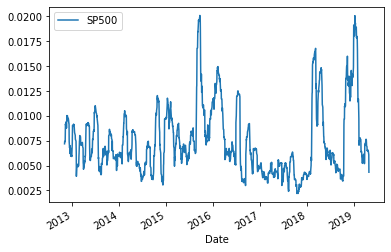

In [417]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_portfolio_rolling21 = whale_portfolio.rolling(window=21).std()
algo_portfolio_rolling21 = algo_portfolio.rolling(window=21).std()
sp500_daily_rolling21 = sp500_daily_returns.rolling(window=21).std()

# Plot the rolling standard deviation
whale_portfolio_rolling21.plot()
algo_portfolio_rolling21.plot()
sp500_daily_rolling21.plot()


### Calculate and plot the correlation

<AxesSubplot:>

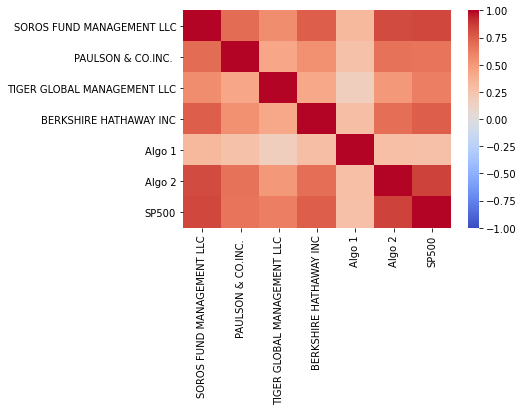

In [418]:
# Calculate the correlation
correlation = combined_returns.corr()

# Display de correlation matrix
correlation
sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm')


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Algo1 Covariance = 1.821774999163274e-05
SP500 Variance = 7.316632424648712e-05
Algo1 Beta = 0.24899091459425635


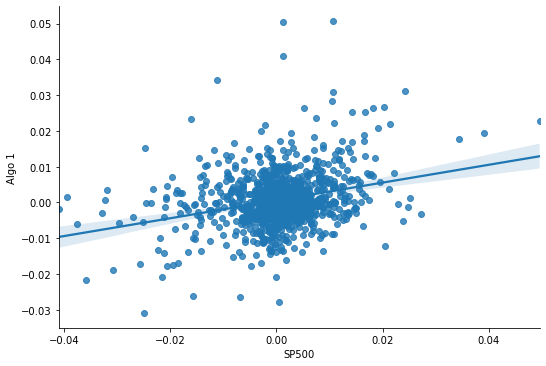

In [419]:
# Calculate covariance of a single portfolio
algo1_covariance = combined_returns['Algo 1'].cov(combined_returns['SP500'])
print(f"Algo1 Covariance = {algo1_covariance}")

# Calculate variance of S&P 500
sp500_variance = combined_returns['SP500'].var()
print(f"SP500 Variance = {sp500_variance}")

# Computing beta
algo1_beta = algo1_covariance/sp500_variance
print(f"Algo1 Beta = {algo1_beta}")

# Plot beta trend
sns.lmplot(x='SP500', y='Algo 1', data=combined_returns, aspect=1.5, fit_reg=True)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [420]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(halflife=21).mean()
combined_returns_ewm


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


<AxesSubplot:xlabel='Date'>

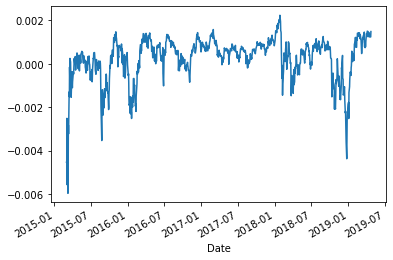

In [421]:
# Plot ewm of S&P 500
combined_returns_ewm['SP500'].plot()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [422]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean()-combined_returns['SP500'].mean()) * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC     -0.345907
PAULSON & CO.INC.             -1.273125
TIGER GLOBAL MANAGEMENT LLC   -0.630067
BERKSHIRE HATHAWAY INC         0.192576
Algo 1                         0.650964
Algo 2                        -0.163336
SP500                          0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

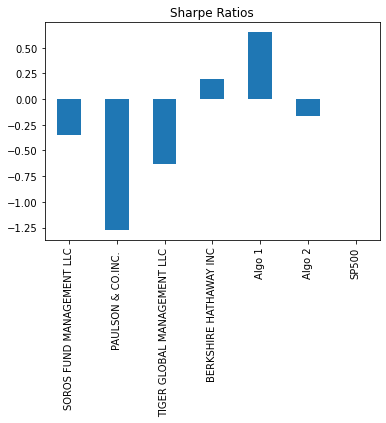

In [423]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on the sharpe ratios, Algo1 strategy is outperforming S&P 500 and the Whales portfolios. However, Algo2 strategy is only outperforming whale portfolios but not S&P 500.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [424]:
# Reading data from 1st stock
google_data = Path("resources/goog_historical.csv")
google = pd.read_csv(
    google_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
google.sort_index(inplace=True)
google.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [425]:
# Reading data from 2nd stock
apple_data = Path("resources/aapl_historical.csv")
apple = pd.read_csv(
    apple_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
apple.sort_index(inplace=True)
apple.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [426]:
# Reading data from 3rd stock
costco_data = Path("resources/cost_historical.csv")
costco = pd.read_csv(
    costco_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True
)
costco.sort_index(inplace=True)
costco.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [427]:
# Combine all stocks in a single DataFrame
all_prices = pd.concat([google, apple, costco], axis="rows", join="inner")
all_prices 

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59
...,...,...
2019-05-03,COST,244.62
2019-05-06,COST,244.23
2019-05-07,COST,240.18


In [428]:
# Reset Date index
all_prices = all_prices.reset_index()
all_prices

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59
...,...,...,...
745,2019-05-03,COST,244.62
746,2019-05-06,COST,244.23
747,2019-05-07,COST,240.18
748,2019-05-08,COST,241.34


In [429]:
# Reorganize portfolio data by having a column per symbol
all_prices = all_prices.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
all_prices.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [430]:
# Calculate daily returns
all_returns = all_prices.pct_change()

# Drop NAs
all_returns = all_returns.dropna().copy()

# Display sample data
all_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [431]:
# Set weights
weights = [1/3,1/3,1/3]

# Calculate portfolio return
portfolio_returns = all_returns.dot(weights)

# Display sample data
portfolio_returns


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [432]:
# Join your returns DataFrame to the original returns DataFrame
overall_returns = pd.concat([combined_returns, portfolio_returns], axis="columns", join="inner")
overall_returns = overall_returns.rename(columns={0:"MyPortfolio"})
overall_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,MyPortfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [433]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
overall_returns = overall_returns.dropna().copy()
overall_returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,MyPortfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [434]:
# Calculate the annualized `std`
volatility = overall_returns.std() * np.sqrt(252)
volatility


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
MyPortfolio                    0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

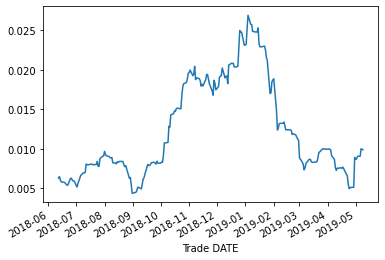

In [435]:
# Calculate rolling standard deviation
myport_volatility_21 = portfolio_returns.rolling(window=21).std()

# Plot rolling standard deviation
myport_volatility_21.plot()


### Calculate and plot the correlation

<AxesSubplot:>

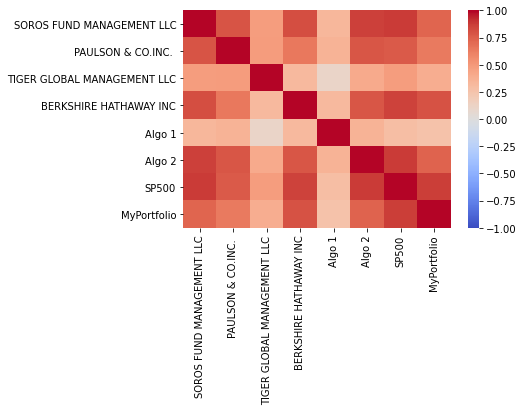

In [436]:
# Calculate and plot the correlation
myport_correlation = overall_returns.corr()

sns.heatmap(myport_correlation, vmin=-1, vmax=1, cmap='coolwarm')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

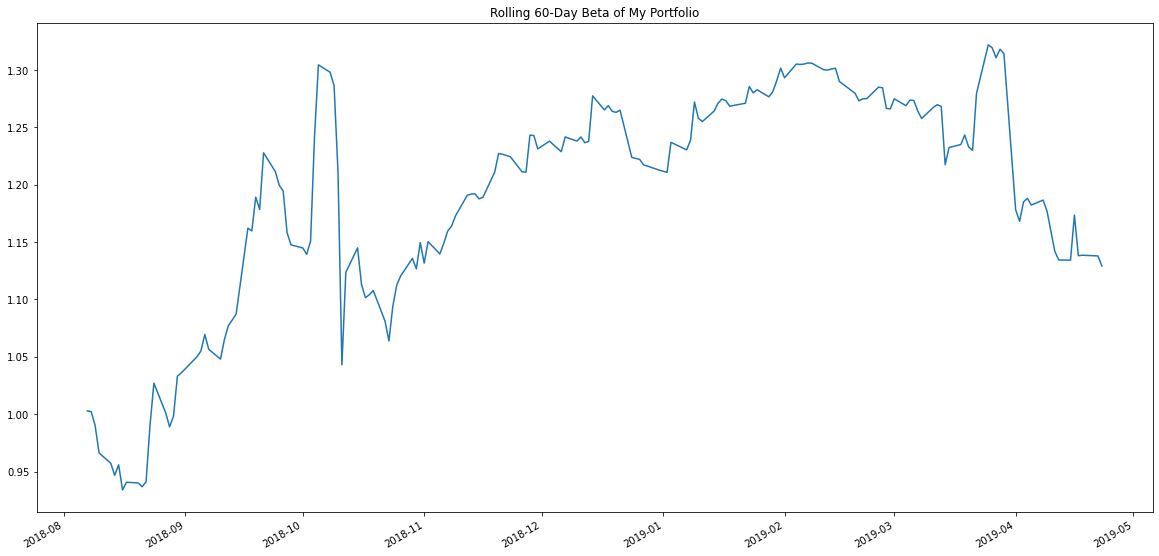

In [437]:
# Calculate and plot Beta
myport_rolling_covariance = overall_returns['MyPortfolio'].rolling(window=60).cov(overall_returns['SP500'])

sp500_rolling_variance = overall_returns['SP500'].rolling(window=60).var()

myport_rolling_beta = myport_rolling_covariance / sp500_rolling_variance
myport_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [438]:
# Calculate Annualzied Sharpe Ratios
myport_sharpe_ratios = ((overall_returns.mean()-overall_returns['SP500'].mean()) * 252) / (overall_returns.std() * np.sqrt(252))
myport_sharpe_ratios


SOROS FUND MANAGEMENT LLC     -0.175552
PAULSON & CO.INC.             -0.503043
TIGER GLOBAL MANAGEMENT LLC   -1.416635
BERKSHIRE HATHAWAY INC        -0.200036
Algo 1                         1.370582
Algo 2                        -0.556585
SP500                          0.000000
MyPortfolio                    0.512669
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

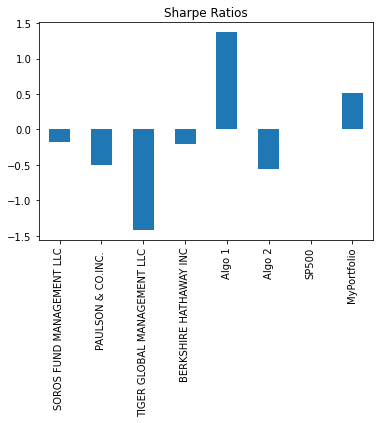

In [439]:
# Visualize the sharpe ratios as a bar plot
myport_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [ ]:
My Portfolio is doing better than S&P 500 as the sharpe ratio is positive when compared to S&P 500. 

However, as it is less than 1, it is considered as sub-optimal. 

Algo1 portfolio seems to be optimal as the sharpe ratio for this is more than 1.